In [8]:
!pip install tqdm
#노트북 성능이 좋지 않아 지난 번 과제에도 프로그램이 돌아간다고는 표시되나 알 수 없고 시간이 너무 오래 걸림
#따라서 이번에는 작업의 진행 상황을 알기 위해 검색 후 시각적으로 표시해 주는 라이브러리를 찾게 됨


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import requests
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup

#딕셔너리로 성경 버전과 이름을 매핑함
VR_DICT = {
    'GAE': '개역개정',
    'RHV': '개역한글', 
    'SAENEW': '새번역',
    'NIV': 'NIV',
    'KJV': 'KJV',
}

#initial 리스트에 성격 책 이름을 저장함
initial = [
    '창', '출', '레', '민', '신', '수', '삿', '룻', '삼상', '삼하', '왕상', '왕하', 
    '대상', '대하', '스', '느', '에', '욥', '시', '잠', '전', '아', '사', '렘', 
    '애', '겔', '단', '호', '욜', '암', '옵', '욘', '미', '나', '합', '습', '학', 
    '슥', '말', '마', '막', '눅', '요', '행', '롬', '고전', '고후', '갈', '엡', 
    '빌', '골', '살전', '살후', '딤전', '딤후', '딛', '몬', '히', '약', '벧전', 
    '벧후', '요일', '요이', '요삼', '유', '계'
]

#크롤링된 데이터를 저장할 딕셔너리
bible = {}

#각 성경 버전을 크롤링함. VR_DICT키를 사용하여 성경 버전 코드를함
for vr in tqdm(VR_DICT.keys()): #진행 상황을 표시하기 위해 tqdm을 사용함
    bible[vr] = {}  #각 성경 버전의 데이터를 저장할 딕셔너리를 초기화함

    #성경 책 이름을 반복함
    for idx, name in tqdm(enumerate(initial), total=len(initial), leave=False):
        vl = idx + 1 #성경 책 번호(1부터 시작)

        #현재 책 이름에 대한 데이터를 저장함
        bible[vr][name] = {}

        #성경의 각 장을 순회하며 크함
        cn = 1
        while True:
            url = f'http://www.holybible.or.kr/B_GAE/cgi/bibleftxt.php?VR={vr}&VL={vl}&CN={cn}&CV=99'
            #크롤링할 URL 데이터를 생성함

            #요청을 보내고 응답을 받는 코드
            res = requests.get(url)
            if res.ok: #요청 성공 시
                res.encoding = 'euc-kr' #한글 인코딩 설정
                soup = BeautifulSoup(res.text, 'html.parser') #HTML을 파싱함
                content_list = soup.select('.tk4br .tk4l')  #구절 데이터를 선택함

                #구절 데이터가 없으면 다음 책으로 이동함
                if len(content_list) == 0:
                    break

                #각 구절 데이터를 수함
                contents = []
                for num, i in enumerate(content_list):
                    contents.append(str(num+1) + ' ' + i.get_text()) #"절 번호 + 구절 내용" 형식으로 저장함

                #현재 장의 데이터를 저장함
                bible[vr][name][cn] = contents
                cn += 1  # 다음 장으로 이동함
            else: #요청 실패 시 상태 코드를 출력함
                print(res.status_code)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

In [11]:
import pandas as pd

#각 성경 구절을 저장할 임시 저장소 역할을 해 줄 data 리스트를 초기화함
data = []

#bible 딕셔너리에서 데이터를 추출함
#vr: 성경 버전 (GAE, NIV 등)
#books: 각 성경 버전에 해당하는 책 데이터
for vr, books in bible.items():
    for book, chapters in books.items(): #book: 책 이름(창,출,레 등), chapters: 해당 책의 장 데이터
        for chapter, verses in chapters.items(): #chapter: 장 번호, verses: 해당 장의 구절 리스트
            for verse in verses: #verse: 구절 텍스트(1 태초에 하나님이 천지를 창조하시니라 등)
                data.append([vr, book, chapter, verse]) #버전, 책, 이름, 장, 번호, 구절 데이터를 리스트에 묶어서 추가함

df = pd.DataFrame(data, columns=['Version', 'Book', 'Chapter', 'Verse']) #pandas 데이터 프레임을 생성함. data 리스트를 기반으로 각 옆에 적절한 이름을 부여함.
df.head() #결과를 확인하기 위해 데이터 일부를 봄

,Version,Book,Chapter,Verse
0,GAE,창,1,1 태초에 하나님이 천지를 창조하시니라
1,GAE,창,1,2 땅이 혼돈하고 공허하며 흑암이 깊음 위에 있고 하나님의 영은 수면 위에 운행하시니라
2,GAE,창,1,3 하나님이 이르시되 빛이 있으라 하시니 빛이 있었고
3,GAE,창,1,4 빛이 하나님이 보시기에 좋았더라 하나님이 빛과 어둠을 나누사
4,GAE,창,1,5 하나님이 빛을 낮이라 부르시고 어둠을 밤이라 부르시니라 저녁이 되고 아침이 되니...


In [13]:
#파일을 저장할 경로를 지정함. 노트북 성능이 좋지 않아 파일 날리는 것을 방지하여 만들어진 데이터를 csv로 저장함.
file_path = r'C:\Users\jsk57\Downloads\bible_data.csv'

#to_csv 메서드를 사용하여 데이터프레임을 csv 파일로 저장함. index=False로 인덱스를 csv 파일에 포함하지 않음. 한글 데이터를 저장할 때 깨짐 현상을 방지하기 위해 UTF-8-SIG 인코딩을 사용함.
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print(f"데이터가 '{file_path}'로 저장되었습니다.") #데이터가 지정된 경로에 저장되었음을 알리도록 저장 완료 메시지를 출력함.

데이터가 'C:\Users\jsk57\Downloads\bible_data.csv'로 저장되었습니다.


In [15]:
!pip install nltk #NLP를 위해 설치함.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00


In [17]:
!pip install konlpy #검색해 보니 nltk와 연관되어 있어 한 번에 같이 설치하는 것을 권장하여 설치함. konlpy도 한국어 자연어 처리를 위한 python 라이브러리라는 것을 공부함.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/19.4 MB 12.1 MB/s eta 0:00:02
   ---------- ----------------------------- 5.2/19.4 MB 12.2 MB/s eta 0:00:02
   --------------- ------------------------ 7.6/19.4 MB 12.3 MB/s eta 0:00:01
   --------------------- ------------------ 10.2/19.4 MB 12.3 MB/s eta 0:00:01
   ------------------------- -------------- 12.6/19.4 MB 12.1 MB/s eta 0:00:01
   ------------------------------- -------- 15.2/19.4 MB 12.2 MB/s eta 0:00:01
   ------------------------------------ --- 17.6/19.4 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------  19.4/19.4 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------  19.4/19.4 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------  19.4/19.4 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 19.4/19.4 MB 8.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--

In [18]:
#데이터 전처리

import re
from nltk.corpus import stopwords as nltk_stopwords
from konlpy.tag import Okt
import nltk

#NLTK에서 영어 불용어인 stopwords를 사용하려면 다운로드가 필요.
nltk.download('stopwords')

#특수문자를 제거함.
def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

#한글 및 영어 불용어 리스트를 정의함. 영어 불용어는 NLTK에서 제공하는 리스트를 사용함. combined_stopwords에 한글과 영어 불용어를 합친 최종 리스트를 저장함.
korean_stopwords = ['은', '는', '이', '가', '에', '와', '과', '도', '그리고', '그러나', '하지만']
english_stopwords = nltk_stopwords.words('english')
combined_stopwords = korean_stopwords + english_stopwords

#형태소 분석을 위해 Okt를 사용함
okt = Okt()

#텍스트를 전처리함.
def preprocess_text(text, language='kor'):
    text = remove_special_characters(text) #특수문자를 제거함.
    #형태소 분석 및 불용어를 제거함.
    tokens = okt.morphs(text) if language == 'kor' else text.split() #한국어일 경우 형태소 분석, 영어일 경우 단어를 분리함.
    tokens = [word.lower() for word in tokens if word.lower() not in combined_stopwords] #불용어를 제거하고 소문자로 변환함.
    return tokens

#구약과 신약 책의 리스트를 정의함. old_testament_books는 구약에 속하는 성경 책 이름 리스트, new_testament_books는 신약에 속하는 성경 책 이름 리스트임.
old_testament_books = ['창', '출', '레', '민', '신', '수', '삿', '룻', '삼상', '삼하', '왕상', '왕하', '대상', '대하', '스', '느', '에', '욥', '시', '잠', '전', '아', '사', '렘', '애', '겔', '단', '호', '욜', '암', '옵', '욘', '미', '나', '합', '습', '학', '슥', '말']
new_testament_books = ['마', '막', '눅', '요', '행', '롬', '고전', '고후', '갈', '엡', '빌', '골', '살전', '살후', '딤전', '딤후', '딛', '몬', '히', '약', '벧전', '벧후', '요일', '요이', '요삼', '유', '계']
#성경 책 이름을 입력받아 구약인지 신약인지 반환함.
def get_testament(book_name):
    if book_name in old_testament_books:
        return 'Old'
    elif book_name in new_testament_books:
        return 'New'
    return 'Unknown'

#데이터프레임에 전처리를 적용함.
df['Verse'] = df['Verse'].apply(remove_special_characters)  #성경 구절에서 특수문자를 제거함.

#각 구절에 대해 불용어를 제거하고, 언어별로 전처리를 수행함.
df['Tokens'] = df.apply(
    lambda row: preprocess_text(row['Verse'], language='kor' if row['Version'] in ['GAE', 'RHV', 'SAENEW'] else 'eng'), 
    axis=1
)

df['Testament'] = df['Book'].apply(get_testament)  #각 성경 책 이름을 기반으로 구약과 신약을 분류함.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jsk57\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [19]:
#NLTK의 stopwords 모듈을 처음 사용해 보기 때문에 불용어를 잘 제거했나 확인해 보기 위함.
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english') #영어 불용어 리스트를 가져옴.
print(english_stopwords[:10])  #불용어 리스트에서 상위 10개의 단어를 출력하여 확인함.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [20]:
#파일을 저장할 경로를 지정함. 노트북 성능이 좋지 않아 파일 날리는 것을 방지하여 만들어진 데이터를 csv로 저장함.
df.to_csv(r'C:\Users\jsk57\Downloads\processed_bible.csv', index=False, encoding='utf-8-sig') #to_csv 메서드를 사용하여 전처리된 데이터프레임을 로컬 폴더 경로로 저장함. index=False를 사용하여 csv 파일에 인덱스를 포함하지 않음. #UTF-8-SIG 인코딩을 사용하여 한글 데이터의 깨짐을 방지함.
print("전처리된 데이터가 저장되었습니다.") #파일 저장이 완료되었음을 알기 위해 저장 완료 메시지를 출력함

전처리된 데이터가 저장되었습니다.


In [22]:
!pip install matplotlib #데이터를 시각화하기 위해 matplotlip을 설치함


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------- -------------------------- 2.6/8.0 MB 12.3 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------ --- 2.4/2.6 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.6 MB/s eta 0:00:00


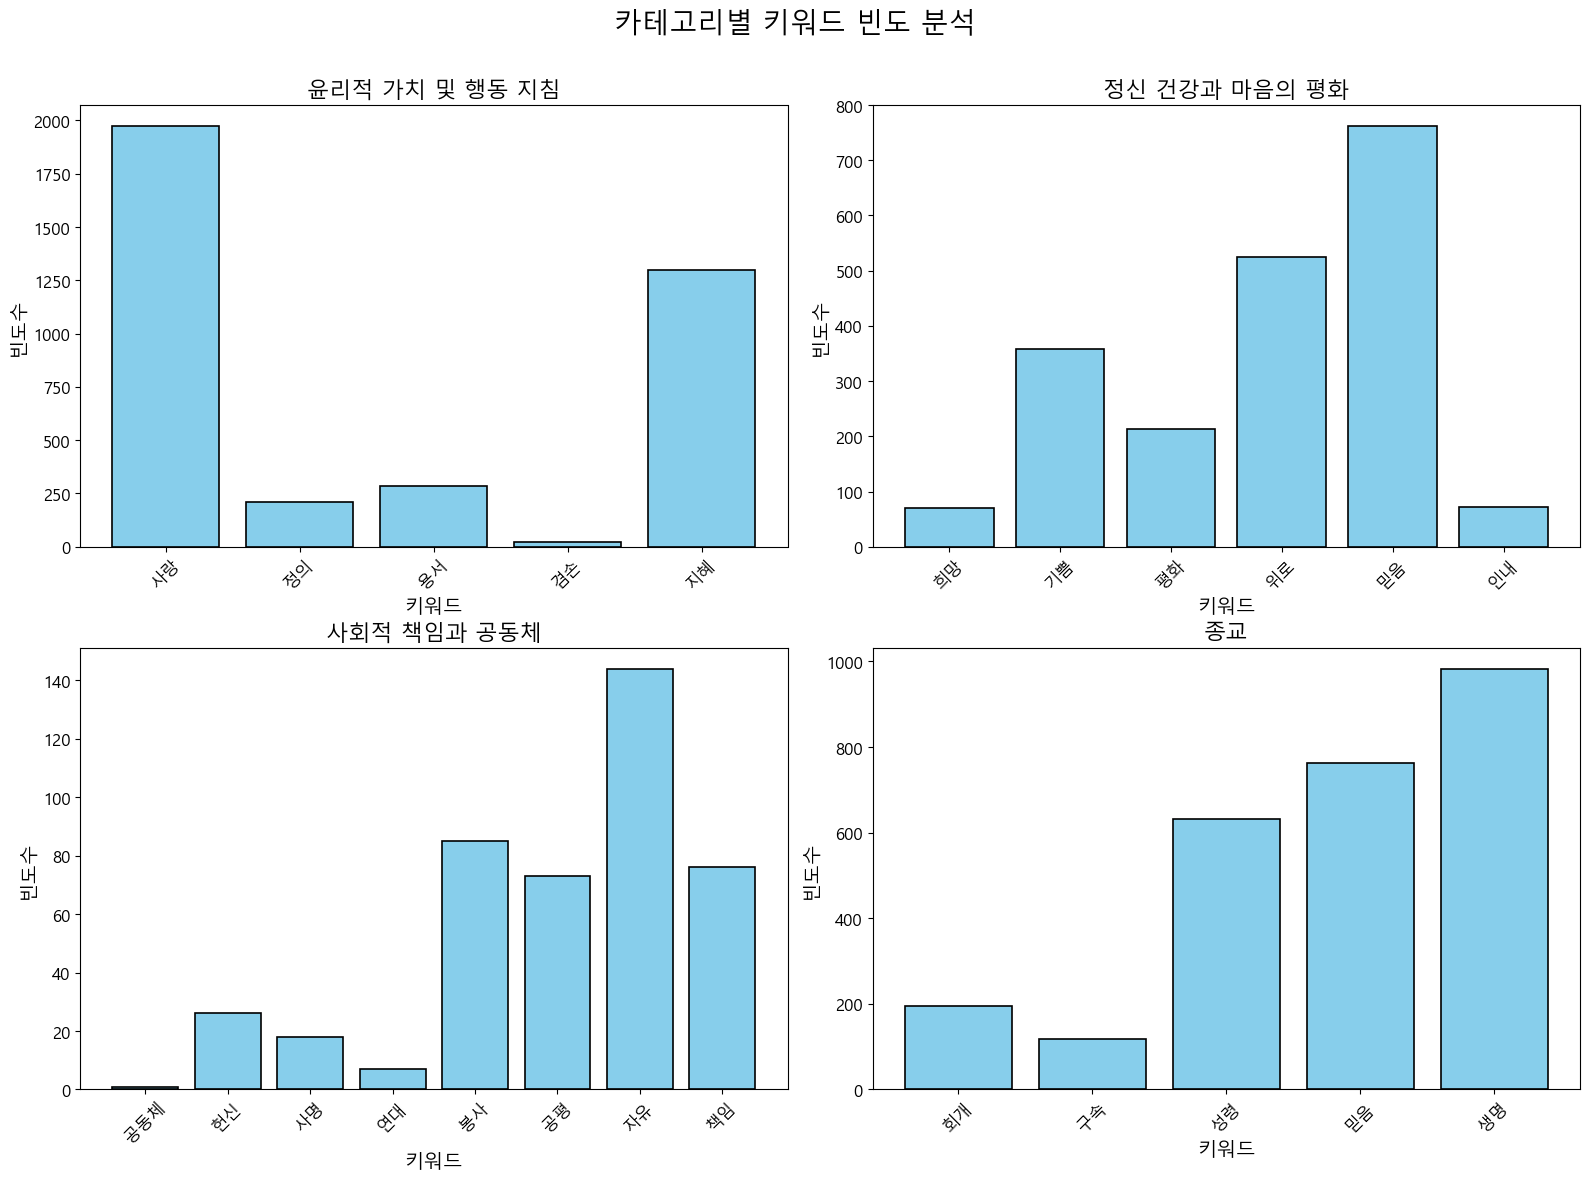

In [28]:
#성경은 종교적 의미뿐만 아니라 현대인들에게 교훈을 주는 윤리적 가치와 행동 지침, 정신 건강과 마음의 평화, 사회 정의와 공동체 책임과 관련된 키워드가 있음.
#따라서 본인의 성경 연구뿐만 아니라 이 프로젝트는 해당 분야에 도움이 되고자 분야별로 주요 키워드를 선정하여 빈도수를 분석함.

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' #matplotlib에서 한글이 깨지지 않도록 폰트를 '맑은 고딕'으로 설정함
plt.rcParams['axes.unicode_minus'] = False #음수 기호가 깨지지 않도록 설정함

#성경 텍스트에서 주요 키워드를 선정하여 카테고리별로 분류함
categories = {
    '윤리적 가치 및 행동 지침': ['사랑', '정의', '용서', '겸손', '지혜'],
    '정신 건강과 마음의 평화': ['희망', '기쁨', '평화', '위로', '믿음', '인내'],
    '사회적 책임과 공동체': ['공동체', '헌신', '사명', '연대', '봉사', '공평', '자유', '책임'],
    '종교': ['회개', '구속', '성령', '믿음', '생명']
}

#각 키워드의 빈도를 계산하고, 새로운 열에 저장함. 키워드가 등장한 횟수를 카운트하여 데이터프레임에 추가함
for category, keywords in categories.items():
    for keyword in keywords:
        df[keyword] = df['Tokens'].apply(lambda tokens: tokens.count(keyword))

#각 카테고리에 해당하는 키워드의 전체 빈도를 합산함
category_totals = {} #각 카테고리와 키워드별 빈도수 합계를 저장하는 딕셔너리
for category, keywords in categories.items():
    category_totals[category] = {keyword: df[keyword].sum() for keyword in keywords}

#카테고리별로 히스토그램을 생성하여 키워드 빈도를 시각화함
plt.figure(figsize=(16, 12))  #전체 크기를 설정함

#각 카테고리에 대해 서브플롯을 생성함
for i, (category, keyword_totals) in enumerate(category_totals.items()):
    plt.subplot(2, 2, i + 1)
    plt.bar(keyword_totals.keys(), keyword_totals.values(), color='skyblue', edgecolor='black', linewidth=1.2) #히스토그램을 생성함
    plt.title(category, fontsize=16)  #카테고리 제목
    plt.xlabel('키워드', fontsize=14)  #x축 라벨
    plt.ylabel('빈도수', fontsize=14)  #y축 라벨
    plt.xticks(rotation=45, fontsize=12)  #키워드 라벨을 45도 회전하여 가독성 향상
    plt.yticks(fontsize=12)  #y축 레이블 크기 조정

plt.tight_layout() #그래프 간 간격 자동 조정
plt.subplots_adjust(top=0.9)  #그래프를 표시함
plt.suptitle('카테고리별 키워드 빈도 분석', fontsize=20)  #전체 제목을 추가함

plt.show() #데이터 확인

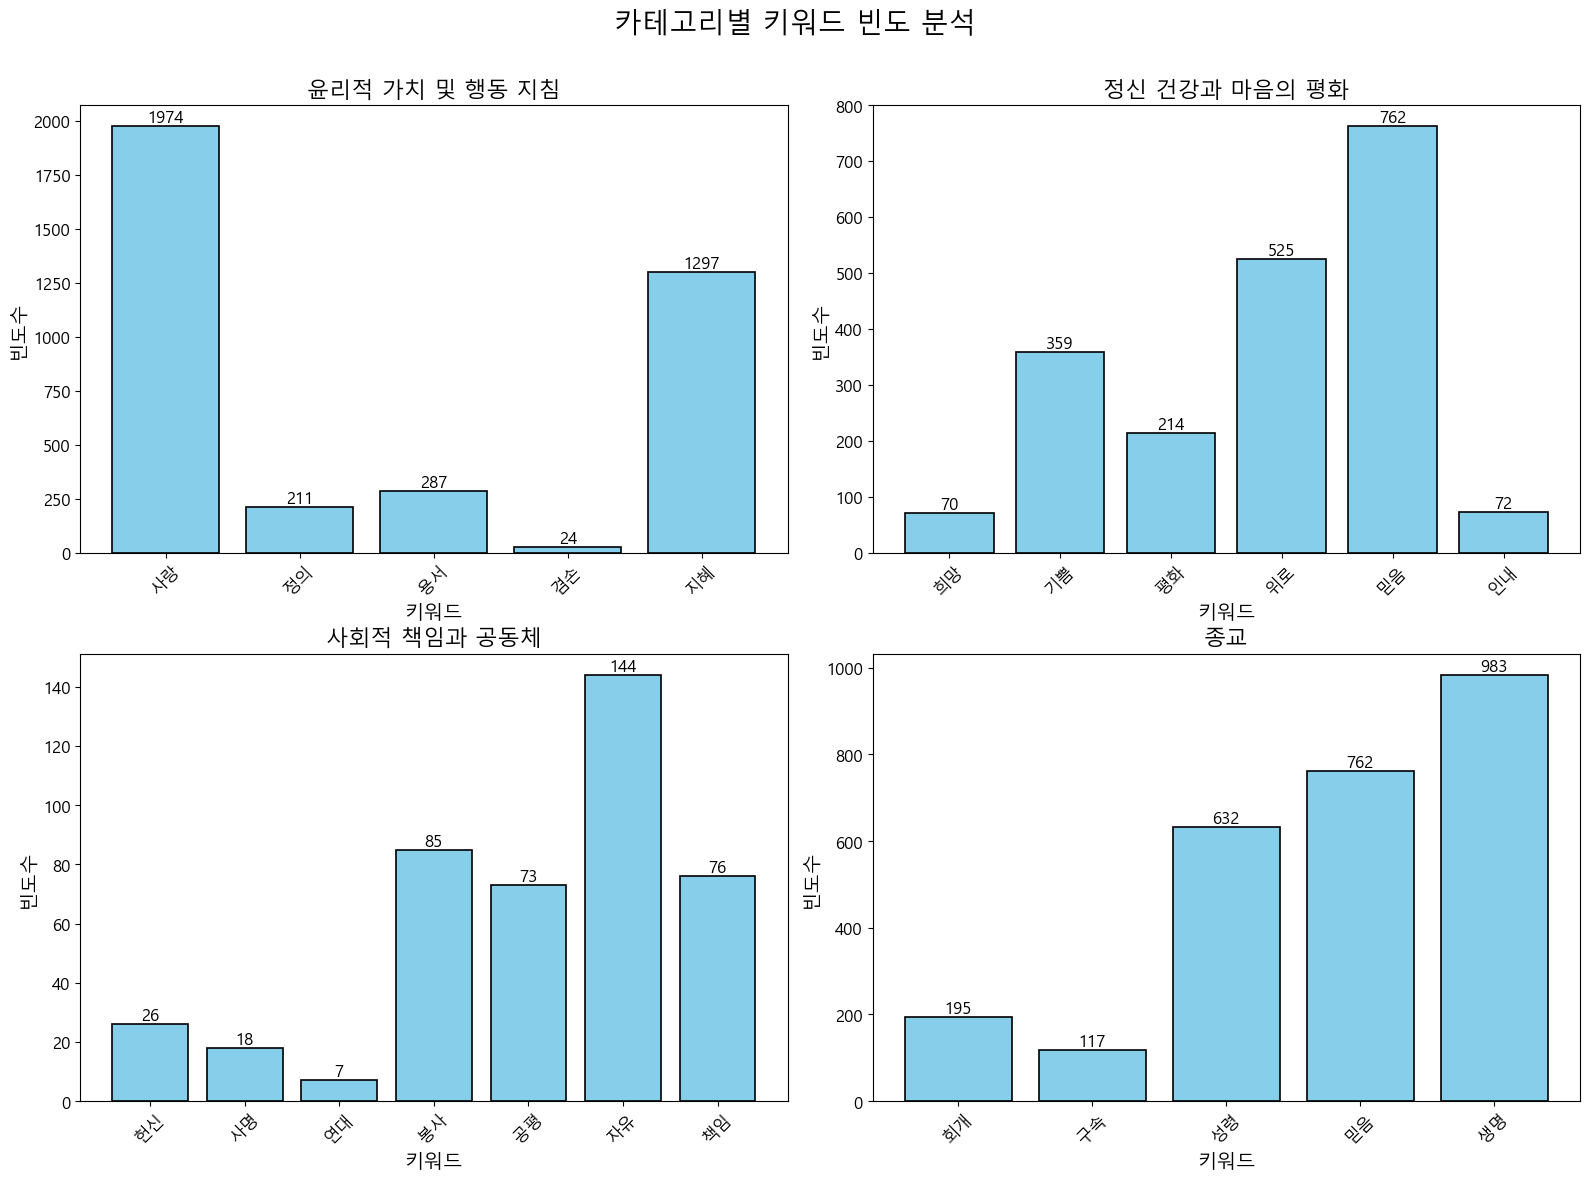

In [33]:
#정확한 빈도수를 단어 별로 각 바 위에 추함

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' #matplotlib에서 한글이 깨지지 않도록 폰트를 '맑은 고딕'으로 설정함
plt.rcParams['axes.unicode_minus'] = False  #음수 기호가 깨지지 않도록 설정함

#성경 텍스트에서 주요 키워드를 선정하여 카테고리별로 분류함
categories = {
    '윤리적 가치 및 행동 지침': ['사랑', '정의', '용서', '겸손', '지혜'],
    '정신 건강과 마음의 평화': ['희망', '기쁨', '평화', '위로', '믿음', '인내'],
    '사회적 책임과 공동체': ['헌신', '사명', '연대', '봉사', '공평', '자유', '책임'],
    '종교': ['회개', '구속', '성령', '믿음', '생명']
}

#각 키워드의 빈도를 계산하고, 새로운 열에 저장함. 키워드가 등장한 횟수를 카운트하여 데이터프레임에 추가함.
for category, keywords in categories.items():
    for keyword in keywords:
        df[keyword] = df['Tokens'].apply(lambda tokens: tokens.count(keyword))

#각 카테고리에 해당하는 키워드의 전체 빈도를 합산함
category_totals = {} #각 카테고리와 키워드별 빈도수 합계를 저장하는 딕셔너리
for category, keywords in categories.items():
    category_totals[category] = {keyword: df[keyword].sum() for keyword in keywords}

#카테고리별로 히스토그램을 생성하여 키워드 빈도를 시각화함
plt.figure(figsize=(16, 12)) #전체 크기를 설정함

#각 카테고리에 대해 서브플롯을 생성함
for i, (category, keyword_totals) in enumerate(category_totals.items()):
    plt.subplot(2, 2, i + 1)
    bars = plt.bar(keyword_totals.keys(), keyword_totals.values(), color='skyblue', edgecolor='black', linewidth=1.2)  #히스토그램을 생성함
    plt.title(category, fontsize=16) #카테고리 제목
    plt.xlabel('키워드', fontsize=14) #x축 라벨
    plt.ylabel('빈도수', fontsize=14) #y축 라벨
    plt.xticks(rotation=45, fontsize=12) #키워드 라벨을 45도 회전하여 가독성 향상
    plt.yticks(fontsize=12) #y축 레이블 크기 조정
    
    #각 바 위에 빈도 숫자를 표시함
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()  #그래프 간 간격 자동 조정
plt.subplots_adjust(top=0.9) #그래프를 표시함
plt.suptitle('카테고리별 키워드 빈도 분석', fontsize=20)  #전체 제목을 추가함

plt.show() #데이터 확인

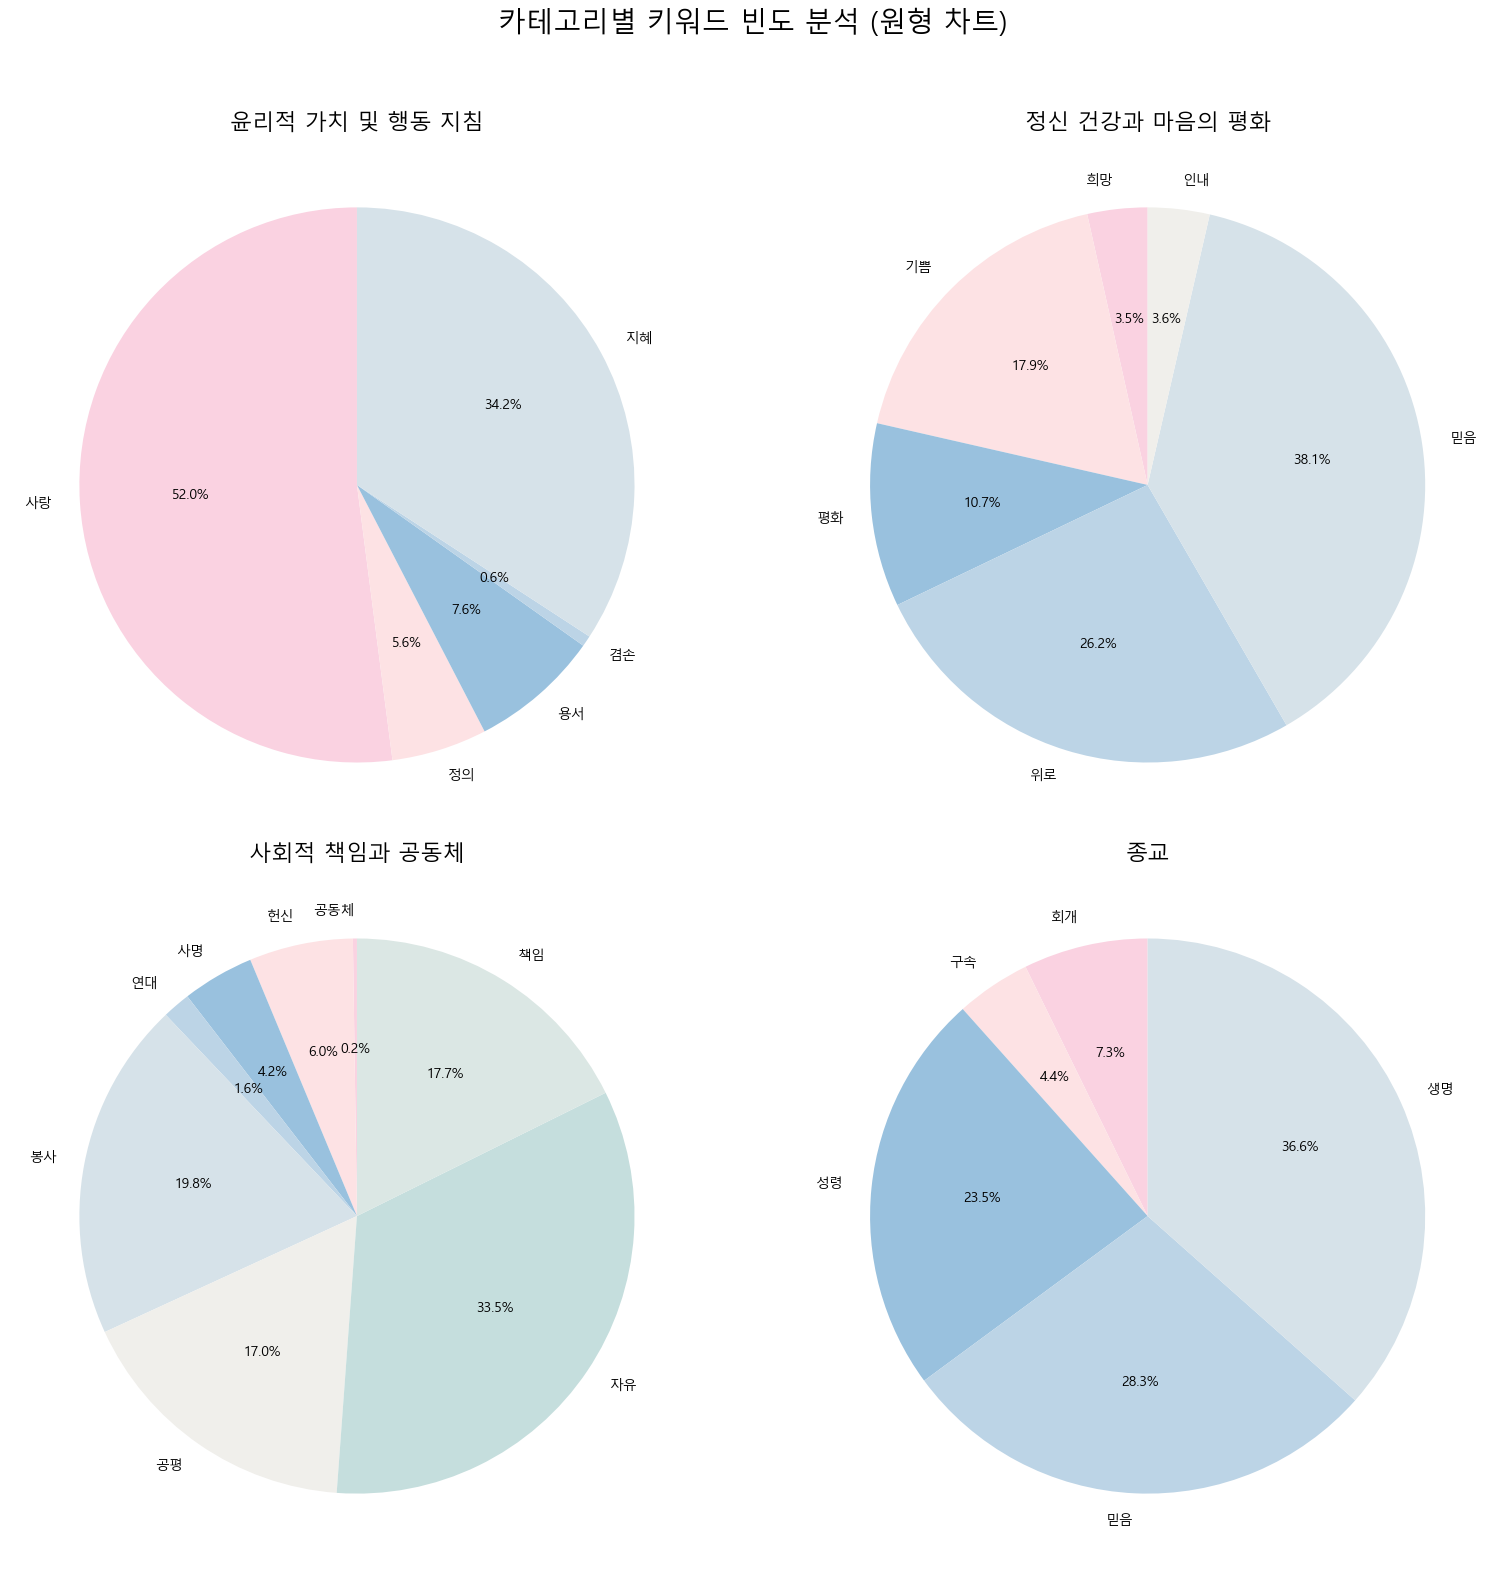

In [48]:
#원형 차트로 시각화하는 것도 좋을 것 같다고 판단하여 실행함

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' #matplotlib에서 한글이 깨지지 않도록 폰트를 '맑은 고딕'으로 설정함
plt.rcParams['axes.unicode_minus'] = False  #음수 기호가 깨지지 않도록 설정함

#성경 텍스트에서 주요 키워드를 선정하여 카테고리별로 분류함
categories = {
    '윤리적 가치 및 행동 지침': ['사랑', '정의', '용서', '겸손', '지혜'],
    '정신 건강과 마음의 평화': ['희망', '기쁨', '평화', '위로', '믿음', '인내'],
    '사회적 책임과 공동체': ['공동체', '헌신', '사명', '연대', '봉사', '공평', '자유', '책임'],
    '종교': ['회개', '구속', '성령', '믿음', '생명']
}

#각 키워드의 빈도를 계산하고, 새로운 열에 저장함. 키워드가 등장한 횟수를 카운트하여 데이터프레임에 추가함.
for category, keywords in categories.items():
    for keyword in keywords:
        df[keyword] = df['Tokens'].apply(lambda tokens: tokens.count(keyword))

#각 카테고리에 해당하는 키워드의 전체 빈도를 합산함
category_totals = {} #각 카테고리와 키워드별 빈도수 합계를 저장하는 딕셔너리
for category, keywords in categories.items():
    category_totals[category] = {keyword: df[keyword].sum() for keyword in keywords}

#원형 차트로 시각화함
plt.figure(figsize=(16, 16)) #전체 차트 크기를 설정함

#원형 차트에서 사용될 색상 팔레트를 지정함
custom_colors = ['#FAD2E1', '#FDE2E4', '#99C1DE', '#BCD4E6', '#D6E2E9', '#F0EFEB', '#C5DEDD', '#DBE7E4']

#카테고리별로 원형 차트를 생성함
for i, (category, keyword_totals) in enumerate(category_totals.items()):
    plt.subplot(2, 2, i + 1) #2x2 레이아웃의 i번째 서브플롯을 생성함
    plt.pie(
        keyword_totals.values(), #키워드 빈도 데이터
        labels=keyword_totals.keys(), #키워드 이름
        autopct='%1.1f%%', #비율 표시 형식
        startangle=90, #원형 차트 시작 각도
        colors=custom_colors[:len(keyword_totals)]  #지정된 색상 적용
    )
    plt.title(category, fontsize=16) #각 차트의 제목 설정

#그래프 간의 간격을 조정하여 겹치지 않게 배치함
plt.tight_layout()
plt.subplots_adjust(top=0.9) #전체 제목과 차트 간의 간격을 조정함
plt.suptitle('카테고리별 키워드 빈도 분석 (원형 차트)', fontsize=20) #전체 제목 설정
plt.show() #차트를 출력함

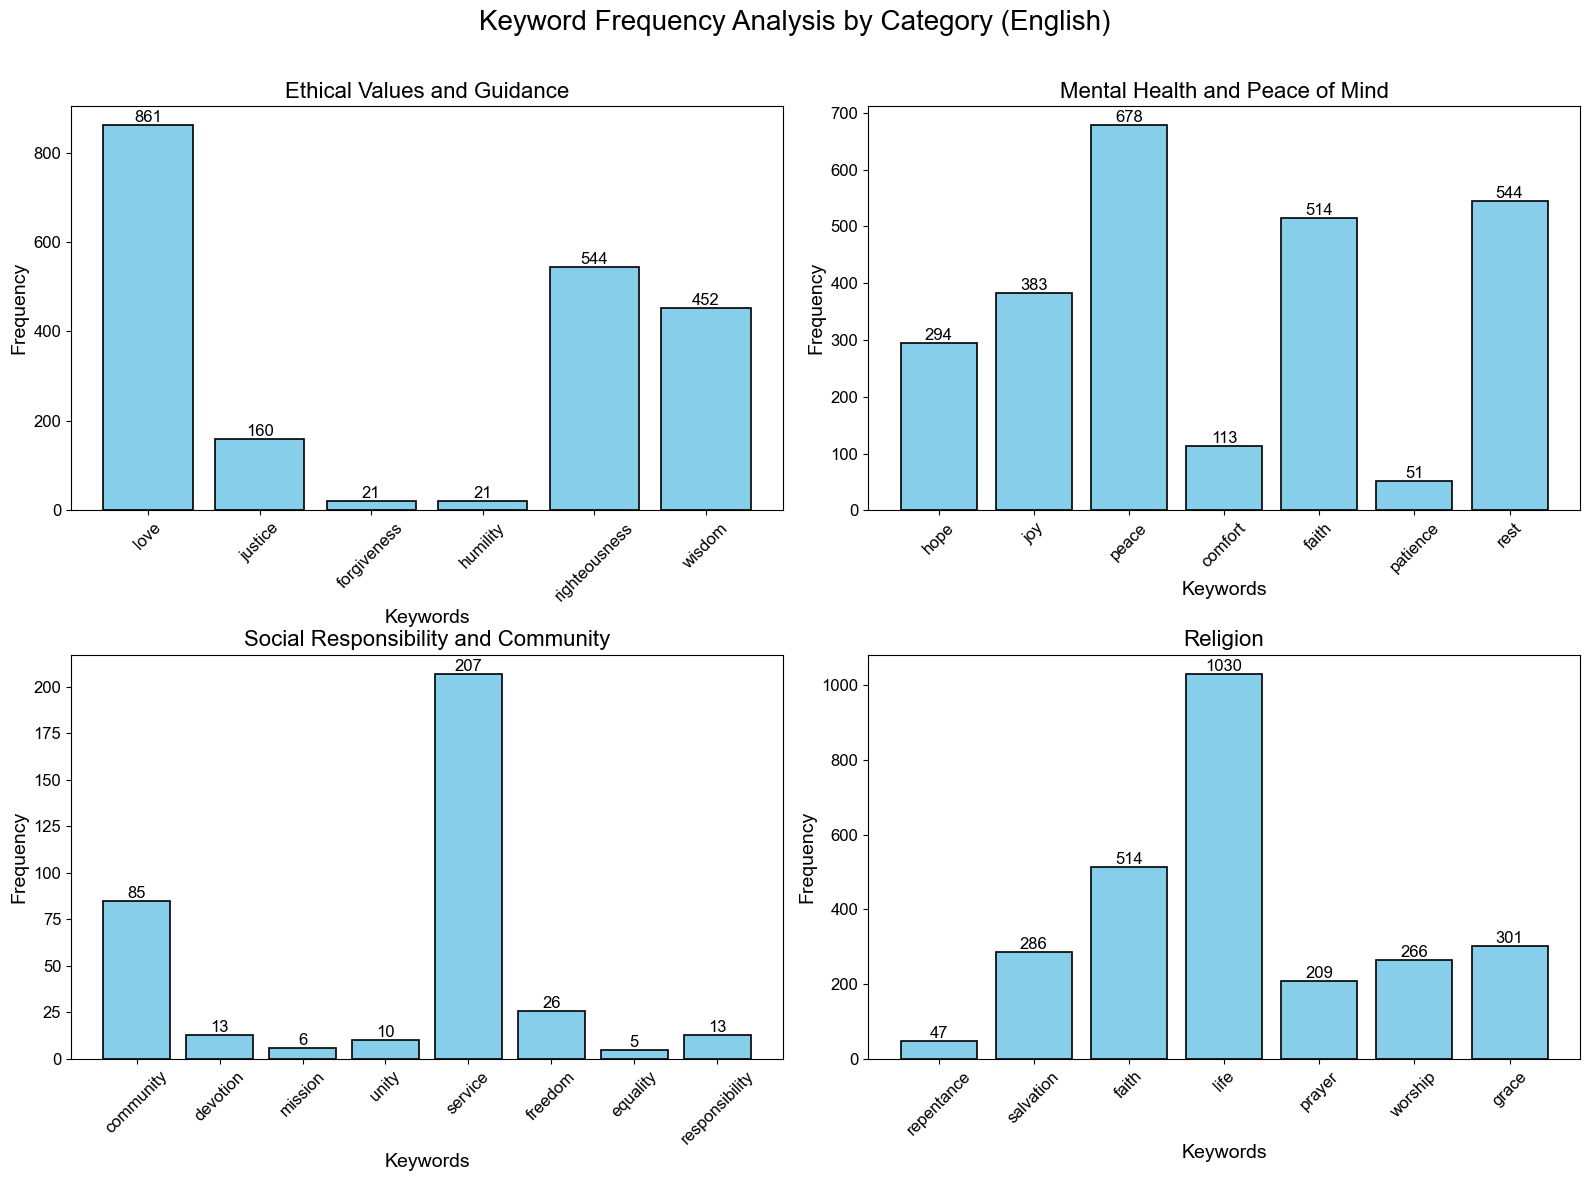

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

#기본 폰트를 Arial로 설정함
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

#성경 텍스트에서 주요 키워드를 선정하여 카테고리별로 분류함
categories = {
    'Ethical Values and Guidance': ['love', 'justice', 'forgiveness', 'humility', 'righteousness', 'wisdom'],
    'Mental Health and Peace of Mind': ['hope', 'joy', 'peace', 'comfort', 'faith', 'patience', 'rest'],
    'Social Responsibility and Community': ['community', 'devotion', 'mission', 'unity', 'service', 'freedom', 'equality', 'responsibility'],
    'Religion': ['repentance', 'salvation', 'faith', 'life', 'prayer', 'worship', 'grace']
}

#각 키워드의 빈도를 계산하고, 새로운 열에 저장함. 키워드가 등장한 횟수를 카운트하여 데이터프레임에 추가함.
for category, keywords in categories.items():
    for keyword in keywords:
        df[keyword] = df['Tokens'].apply(lambda tokens: tokens.count(keyword))

#각 카테고리에 해당하는 키워드의 전체 빈도를 합산함
category_totals = {} #각 카테고리와 키워드별 빈도수 합계를 저장하는 딕셔너리
for category, keywords in categories.items():
    category_totals[category] = {keyword: df[keyword].sum() for keyword in keywords}

#카테고리별로 히스토그램을 생성하여 키워드 빈도를 시각화함
plt.figure(figsize=(16, 12)) #전체 크기를 설정함

#각 카테고리에 대해 서브플롯을 생성함
for i, (category, keyword_totals) in enumerate(category_totals.items()):
    plt.subplot(2, 2, i + 1)
    bars = plt.bar(keyword_totals.keys(), keyword_totals.values(), color='skyblue', edgecolor='black', linewidth=1.2) #히스토그램을 생성함
    plt.title(category, fontsize=16) #카테고리 제목
    plt.xlabel('Keywords', fontsize=14) #x축 라벨
    plt.ylabel('Frequency', fontsize=14) #y축 라벨
    plt.xticks(rotation=45, fontsize=12) #키워드 라벨을 45도 회전하여 가독성 향상
    plt.yticks(fontsize=12) #y축 레이블 크기 조정
    
    #각 바 위에 빈도 숫자를 표시함
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout() #그래프 간 간격 자동 조정
plt.subplots_adjust(top=0.9)  #그래프를 표시함
plt.suptitle('Keyword Frequency Analysis by Category (English)', fontsize=20) #전체 제목을 추가함
plt.show() #데이터 확인

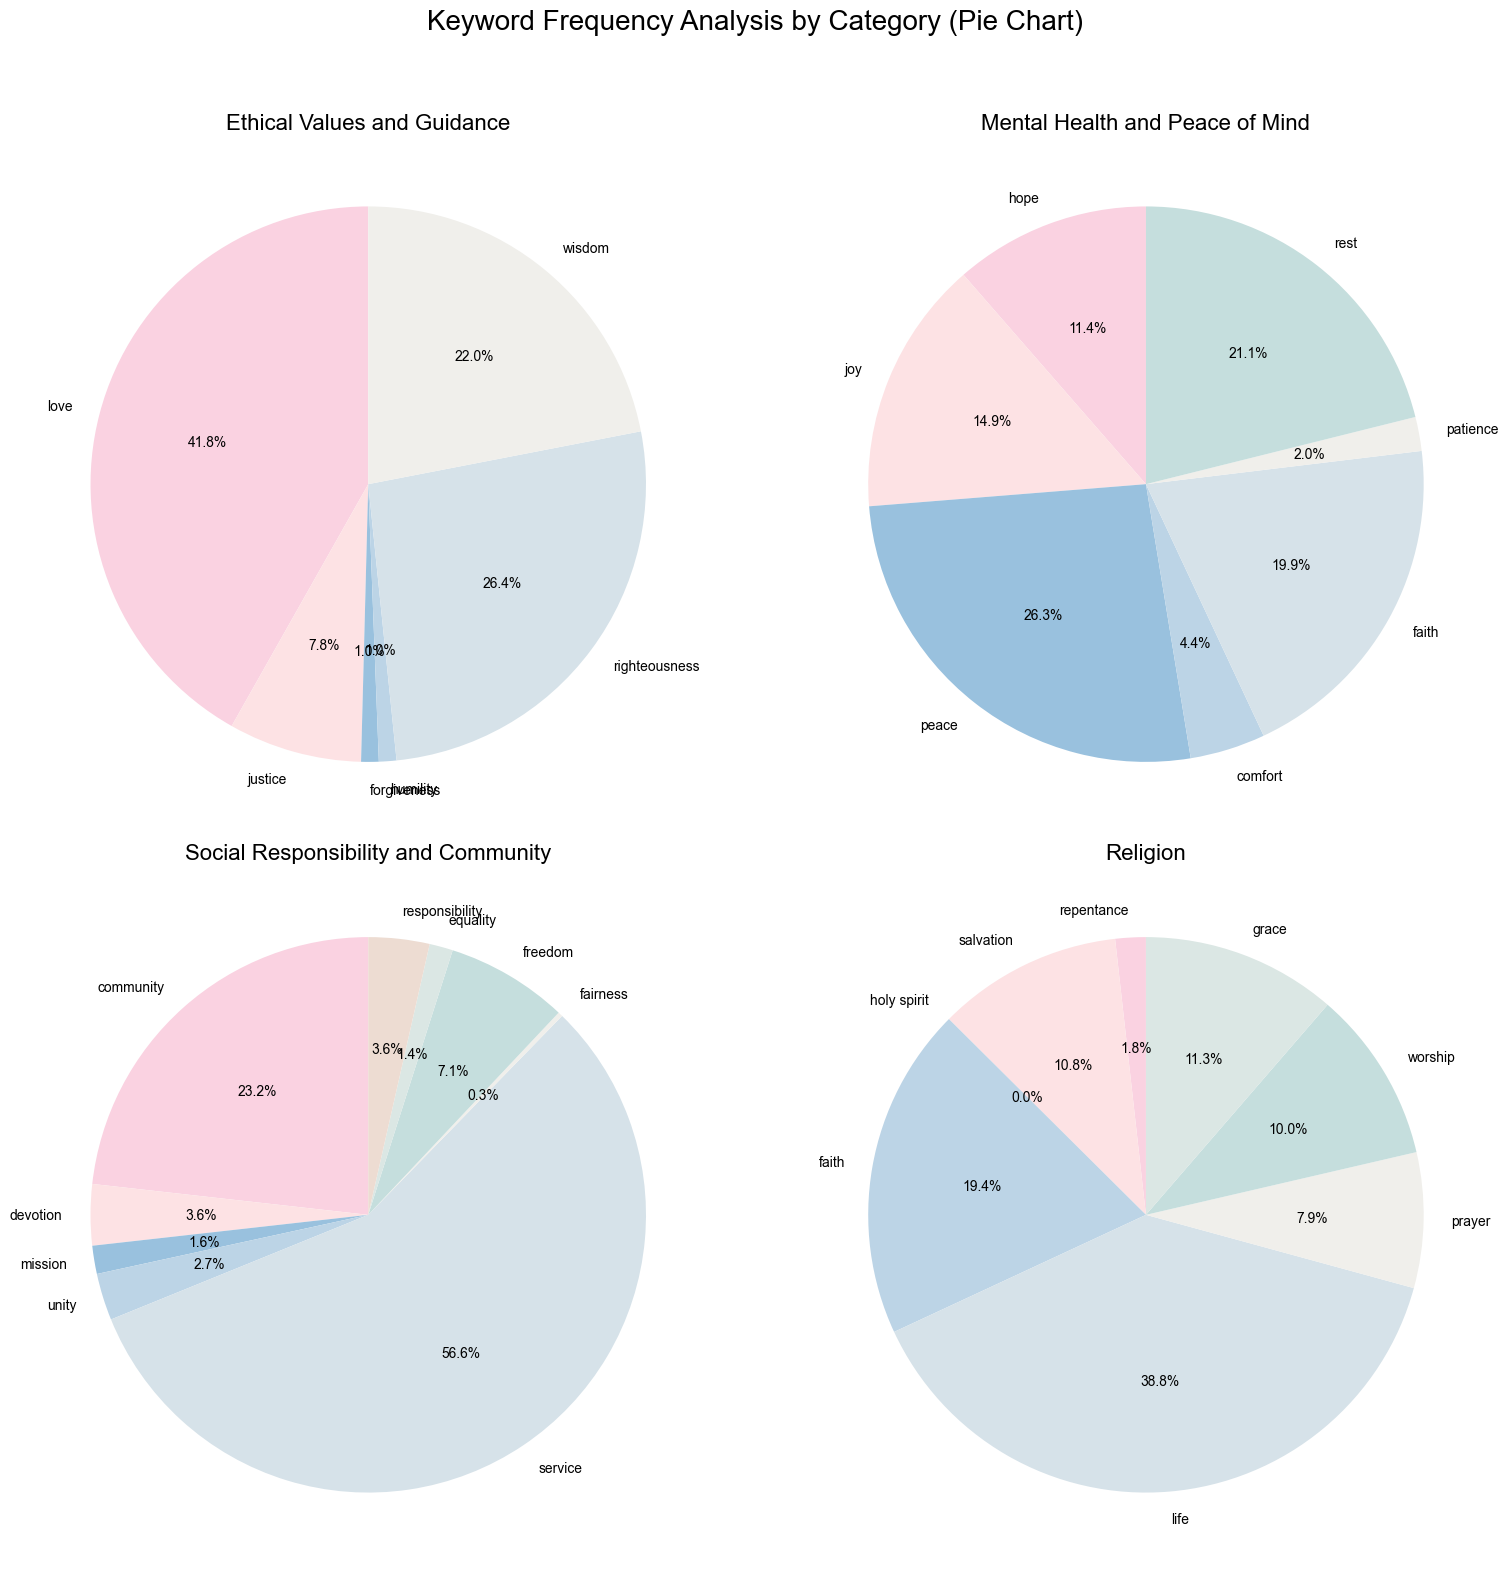

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

#기본 폰트를 Arial로 설정함
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

#성경 텍스트에서 주요 키워드를 선정하여 카테고리별로 분류함
categories = {
    'Ethical Values and Guidance': ['love', 'justice', 'forgiveness', 'humility', 'righteousness', 'wisdom'],
    'Mental Health and Peace of Mind': ['hope', 'joy', 'peace', 'comfort', 'faith', 'patience', 'rest'],
    'Social Responsibility and Community': ['community', 'devotion', 'mission', 'unity', 'service', 'fairness', 'freedom', 'equality', 'responsibility'],
    'Religion': ['repentance', 'salvation', 'holy spirit', 'faith', 'life', 'prayer', 'worship', 'grace']
}

#각 키워드의 빈도를 계산하고, 새로운 열에 저장함. 키워드가 등장한 횟수를 카운트하여 데이터프레임에 추가함.
for category, keywords in categories.items():
    for keyword in keywords:
        df[keyword] = df['Tokens'].apply(lambda tokens: tokens.count(keyword))

#각 카테고리에 해당하는 키워드의 전체 빈도를 합산함
category_totals = {} #각 카테고리와 키워드별 빈도수 합계를 저장하는 딕셔너리
for category, keywords in categories.items():
    category_totals[category] = {keyword: df[keyword].sum() for keyword in keywords}

#원형 차트로 시각화함
plt.figure(figsize=(16, 16)) #전체 차트 크기를 설정함

#원형 차트에서 사용될 색상 팔레트를 지정함
custom_colors = ['#FAD2E1', '#FDE2E4', '#99C1DE', '#BCD4E6', '#D6E2E9', '#F0EFEB', '#C5DEDD', '#DBE7E4', '#EDDCD2']

#카테고리별로 원형 차트를 생성함
for i, (category, keyword_totals) in enumerate(category_totals.items()):
    plt.subplot(2, 2, i + 1)  #2x2 레이아웃의 i번째 서브플롯을 생성함
    plt.pie(
        keyword_totals.values(), #키워드 빈도 데이터
        labels=keyword_totals.keys(), #키워드 이름
        autopct='%1.1f%%',  #비율 표시 형식
        startangle=90, #원형 차트 시작 각도
        colors=custom_colors[:len(keyword_totals)]  #지정된 색상 적용
    )
    plt.title(category, fontsize=16) #각 차트의 제목 설정

#그래프 간의 간격을 조정하여 겹치지 않게 배치함
plt.tight_layout()
plt.subplots_adjust(top=0.9) #전체 제목과 차트 간의 간격을 조정함
plt.suptitle('Keyword Frequency Analysis by Category (Pie Chart)', fontsize=20)  #전체 제목 설정
plt.show() #차트를 출력함

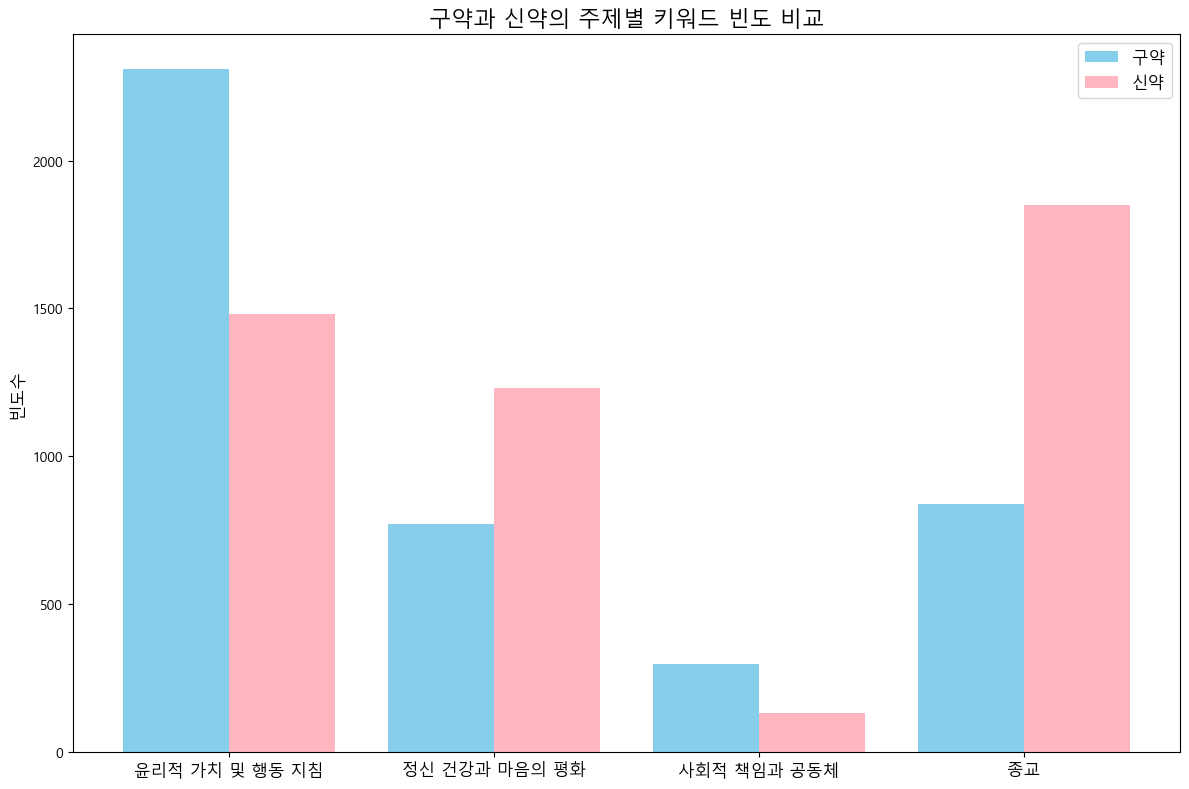

In [70]:
#구약과 신약의 변화에 따른 주요 키워드의 빈도수 변화를 알아보고자 함.

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' #matplotlib에서 한글이 깨지지 않도록 폰트를 '맑은 고딕'으로 설정함
plt.rcParams['axes.unicode_minus'] = False #음수 기호가 깨지지 않도록 설정함

#성경 텍스트에서 주요 키워드를 선정하여 카테고리별로 분류함
categories = {
    '윤리적 가치 및 행동 지침': ['사랑', '정의', '용서', '겸손', '지혜'],
    '정신 건강과 마음의 평화': ['희망', '기쁨', '평화', '위로', '믿음', '인내'],
    '사회적 책임과 공동체': ['헌신', '사명', '연대', '봉사', '공평', '자유', '책임'],
    '종교': ['회개', '구속', '성령', '믿음', '생명']
}

#구약과 신약의 성경 책 리스트를 정의함. old_testament_books가 구약, new_testament_books가 신약 성경의 책 이름 리스트임.
old_testament_books = ['창', '출', '레', '민', '신', '수', '삿', '룻', '삼상', '삼하', '왕상', '왕하', '대상', 
                       '대하', '스', '느', '에', '욥', '시', '잠', '전', '아', '사', '렘', '애', '겔', '단', '호', 
                       '욜', '암', '옵', '욘', '미', '나', '합', '습', '학', '슥', '말']
new_testament_books = ['마', '막', '눅', '요', '행', '롬', '고전', '고후', '갈', '엡', '빌', '골', '살전', '살후', 
                       '딤전', '딤후', '딛', '몬', '히', '약', '벧전', '벧후', '요일', '요이', '요삼', '유', '계']

#각 이름을 기준으로 구약과 신약으로 분류함
def get_testament(book_name):
    if book_name in old_testament_books:
        return '구약'
    elif book_name in new_testament_books:
        return '신약'
    return 'Unknown'

#데이터프레임에 구약과 신약을 구분하는 열을 추가함
df['Testament'] = df['Book'].apply(get_testament)

#주제별로 구약과 신약의 키워드 빈도 합산을 계산함
category_totals_testament = {}
for category, keywords in categories.items():
    #구약과 신약 각각의 키워드 합계를 계산함
    category_totals_testament[category] = {
        '구약': sum(df.loc[df['Testament'] == '구약', keyword].sum() for keyword in keywords),
        '신약': sum(df.loc[df['Testament'] == '신약', keyword].sum() for keyword in keywords)
    }

#바 차트를 시각화함
plt.figure(figsize=(12, 8)) #차트 크기를 설정함

#x축 위치를 설정함
x = range(len(categories))  #카테고리의 개수만큼 X축 위치를 생성함
width = 0.4  #막대 폭을 설정함

#카테고리별로 구약과 신약의 빈도수 막대를 생성
for i, (category, totals) in enumerate(category_totals_testament.items()):
    plt.bar(i - width / 2, totals['구약'], width, label='구약' if i == 0 else "", color='#87CEEB')
    plt.bar(i + width / 2, totals['신약'], width, label='신약' if i == 0 else "", color='#FFB6C1')

plt.xticks(x, categories.keys(), fontsize=12) #x축 레이블을 카테고리 이름으로 설정함
plt.ylabel('빈도수', fontsize=12) #y축 레이블을 설정함
plt.title('구약과 신약의 주제별 키워드 빈도 비교', fontsize=16) #그래프 제목을 설정함
plt.legend(fontsize=12) #범례를 추가함
plt.tight_layout() #그래프 요소 간 간격을 조정함
plt.show() #그래프를 출력함

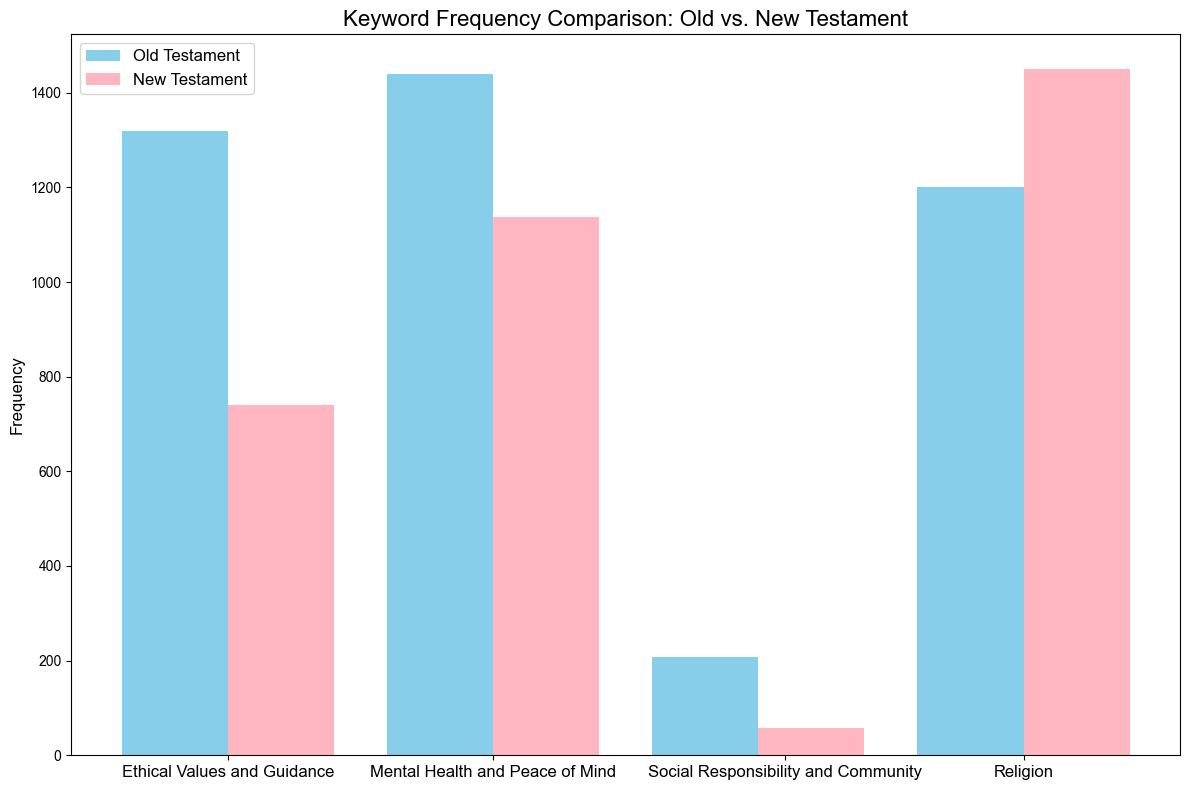

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

#기본 폰트를 Arial로 설정함
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

#성경 텍스트에서 주요 키워드를 선정하여 카테고리별로 분류함
categories = {
    'Ethical Values and Guidance': ['love', 'justice', 'forgiveness', 'humility', 'righteousness', 'wisdom'],
    'Mental Health and Peace of Mind': ['hope', 'joy', 'peace', 'comfort', 'faith', 'patience', 'rest'],
    'Social Responsibility and Community': ['devotion', 'mission', 'solidarity', 'service', 'fairness', 'freedom', 'responsibility'],
    'Religion': ['repentance', 'salvation', 'holy spirit', 'faith', 'life', 'prayer', 'worship', 'grace']
}

#구약과 신약의 성경 책 리스트를 정의함. old_testament_books가 구약, new_testament_books가 신약 성경의 책 이름 리스트임.
old_testament_books = ['창', '출', '레', '민', '신', '수', '삿', '룻', '삼상', '삼하', '왕상', '왕하', '대상', 
                       '대하', '스', '느', '에', '욥', '시', '잠', '전', '아', '사', '렘', '애', '겔', '단', '호', 
                       '욜', '암', '옵', '욘', '미', '나', '합', '습', '학', '슥', '말']
new_testament_books = ['마', '막', '눅', '요', '행', '롬', '고전', '고후', '갈', '엡', '빌', '골', '살전', '살후', 
                       '딤전', '딤후', '딛', '몬', '히', '약', '벧전', '벧후', '요일', '요이', '요삼', '유', '계']

#각 이름을 기준으로 구약과 신약으로 분류함
def get_testament(book_name):
    if book_name in old_testament_books:
        return 'Old Testament'
    elif book_name in new_testament_books:
        return 'New Testament'
    return 'Unknown'

#데이터프레임에 구약과 신약을 구분하는 열을 추가함
df['Testament'] = df['Book'].apply(get_testament)

#주제별로 구약과 신약의 키워드 빈도 합산을 계산함
category_totals_testament = {}
for category, keywords in categories.items():
    #구약과 신약 각각의 키워드 합계를 계산함
    category_totals_testament[category] = {
        'Old Testament': sum(df.loc[df['Testament'] == 'Old Testament', keyword].sum() for keyword in keywords),
        'New Testament': sum(df.loc[df['Testament'] == 'New Testament', keyword].sum() for keyword in keywords)
    }

#바 차트를 시각화함
plt.figure(figsize=(12, 8)) #차트 크기를 설정함

#x축 위치를 설정함
x = [0, 1, 2.1, 3] #카테고리의 개수만큼 X축 위치를 생성함. 기존 크기는 'Mental Health and Peace of Mind'와 'Social Responsibility and Community'가 거의 붙어 있어 전체적으로 줄이고 둘 사이를 조금 띄움
width = 0.4  #막대 폭을 설정함

#카테고리별로 구약과 신약의 빈도수 막대를 생성
for i, (category, totals) in enumerate(category_totals_testament.items()):
    plt.bar(i - width / 2, totals['Old Testament'], width, label='Old Testament' if i == 0 else "", color='#87CEEB')
    plt.bar(i + width / 2, totals['New Testament'], width, label='New Testament' if i == 0 else "", color='#FFB6C1')

plt.xticks(x, categories.keys(), fontsize=12) #x축 레이블을 카테고리 이름으로 설정함
plt.ylabel('Frequency', fontsize=12) #y축 레이블을 설정함
plt.title('Keyword Frequency Comparison: Old vs. New Testament', fontsize=16) #그래프 제목을 설정함
plt.legend(fontsize=12) #범례를 추가함
plt.tight_layout() #그래프 요소 간 간격을 조정함
plt.show() #그래프를 출력함

In [90]:
pip install wordcloud
#분야별로 주요 키워드를 보는 것도 좋지만, 전체적으로 성경에서 빈도수가 높은 단어를 알고 싶었음.
#워드 클라우드를 이용하는 것이 좋다고 판단하여 wordcloud 모듈을 설치함.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


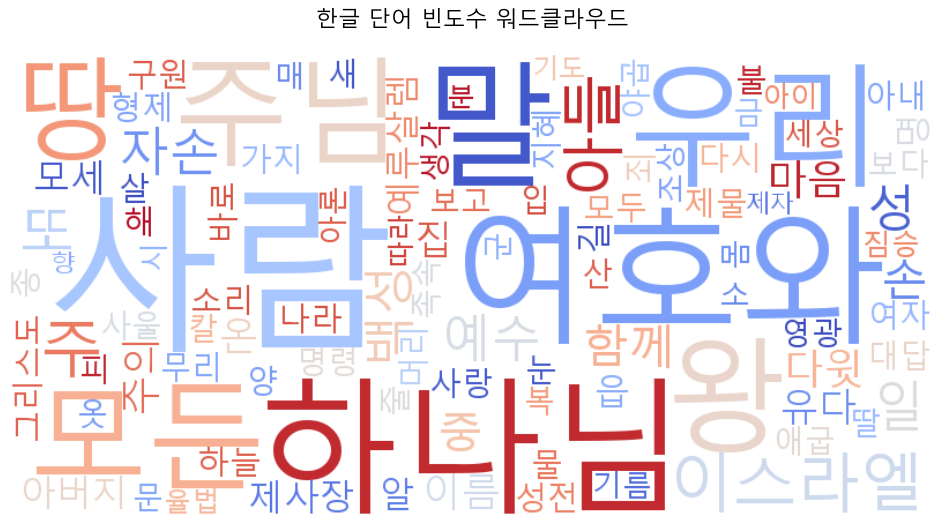

In [143]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

plt.rcParams['font.family'] = 'Malgun Gothic'  #matplotlib에서 한글이 깨지지 않도록 폰트를 '맑은 고딕'으로 설정함
plt.rcParams['axes.unicode_minus'] = False  #음수 기호가 깨지지 않도록 설정함

#불용어 리스트 정의함.
#'성경'이라는 특수성으로 인해 미처 제거되지 못한 불용어들 '이르되', '가로되', '하여라', '말미암아' 등을 포함한 의미가 담겨 있지 않은 불용어를 제거함.
#단어로서 의미를 가지는 명사이긴 하나, 성경 텍스트 분석 상으로는 의미가 없는 단어를 제거함. '다음', '여러분', '나' 등. 
stopwords = ['이다', '것', '을', '의', '그', '를', '하다', '하고', '하며', '하나', '하여', '께서', '아', '있', '다', '하였', '말씀', 
             '에게', '들', '에서', '으로', '하는', '하게', '하니', '여', '하였다', '라', '께', '에는', '로', '이는', '때', '까지',
             '이며', '하지', '곳', '하', '요', '고', '대로', '기를', '하리', '속', '그것', '자는', '있는', '고', '자가', '이라', '게',
             '만', '같이', '거기', '함', '저', '곳', '지', '안', '저', '전', '자', '하신', '니', '서', '곧', '하라', '이르되', '나', 
             '그러므로', '여러분', '할', '된', '며', '이르시되', '이니', '한다', '네', '자기', '나를', '인', '날', '입니다', '에게서',
             '내게', '하기를', '때문', '이니라', '히', '이나', '가로되', '이제', '요', '이르', '후', '거', '이렇게', '하셨다', '이니라', '동안', '저희', '수', '음', 
             '세', '말라', '자를', '와서', '제', '누구', '다른', '께서는', '뒤', '이여', '무엇', '앞', '위', '아무', '처럼', '하시고',
             '두', '야', '말미암아', '너', '행', '가서', '될', '한', '하면', '에게로', '만일', '하여라', '너희', '못', '심', '더', 
             '구', '일이', '자의', '단', '면', '에게는', '바', '내', '많은', '다음', '큰','여기', '열', '즉', '십', '년', '마리', 
             '당신', '여러', '어떤', '가운데']

#Version 열이 GAE, RHV, SAENEW인 행만 필터링함. 한글 텍스트만 선정하기 위함.
filtered_df = df[df['Version'].isin(['GAE', 'RHV', 'SAENEW'])]

#Tokens 열에서 모든 단어를 수집함
all_tokens = []
for tokens in filtered_df['Tokens']:
    #값이 리스트인지 확인하고, 그렇지 않으면 변환함
    if isinstance(tokens, list): #리스트라면 바로 추가함
        all_tokens.extend(tokens)
    elif isinstance(tokens, str):  #문자열이라면 리스트로 변환 후 추가함
        all_tokens.extend(eval(tokens)) #eval로 문자열 형태의 리스트를 실제 리스트로 변환함

#숫자, 한글이 아닌 단어, 불용어를 제외함
filtered_tokens = [token for token in all_tokens if not token.isdigit() and re.match(r'^[가-힣]+$', token) and token not in stopwords]

#collections.Counter를 사용하여 각 단어의 빈도수를 계산함
word_counts = Counter(filtered_tokens)

#워드클라우드를 생성
wordcloud = WordCloud(
    font_path='malgun.ttf',  #한글 폰트 경로
    width=800, #워드클라우드 이미지 너비
    height=400, #워드클라우드 이미지 높이
    background_color='white', #배경색
    colormap='coolwarm', #색상 맵. 다른 맵에 비해 가장 가독성이 좋다고 판단함.
    max_words=100, #표시할 최대 단어 수
).generate_from_frequencies(word_counts) #단어 빈도 데이터를 사용하여 워드클라우드 생성

#워드클라우드를 시각화함
plt.figure(figsize=(12, 6)) #그래프 크기 설정
plt.imshow(wordcloud, interpolation='bilinear') #워드클라우드 이미지를 화면에 표시함
plt.axis('off')  #축을 제거함
plt.title('한글 단어 빈도수 워드클라우드', fontsize=16, pad=20) #그래프 제목을 설정함
plt.show() #그래프를 출력함

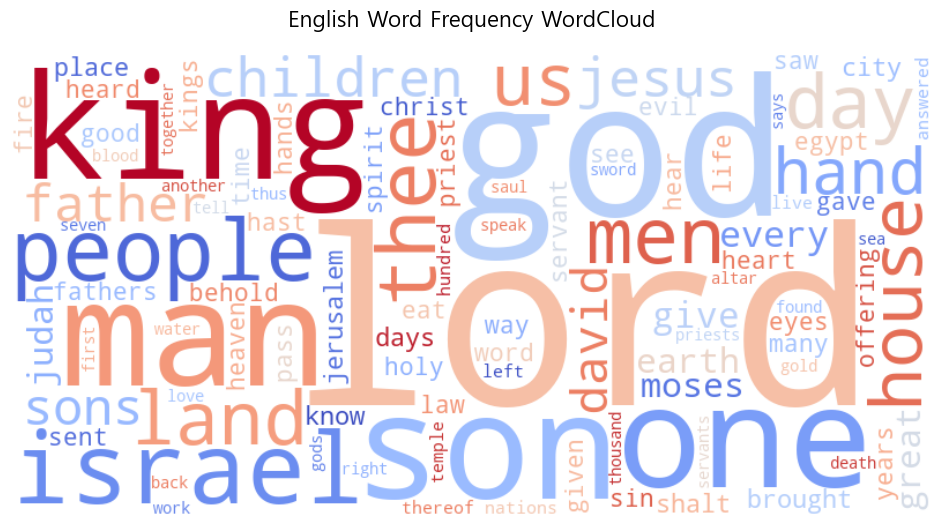

In [150]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

#불용어 리스트 정의함.
#'성경'이라는 특수성으로 인해 미처 제거되지 못한 불용어들을 포함한 의미가 담겨 있지 않은 불용어를 제거함. 옛날 고어가 많이 사용되어 제거함. unto, saith, thou, thy, thine 등.
#단어로서 의미를 가지는 명사이긴 하나, 성경 텍스트 분석 상으로는 의미가 없는 단어를 제거함. name, words, came, set 등.
stopwords = [
    'and', 'or', 'the', 'a', 'an', 'is', 'are', 'was', 'were', 'be', 'been', 'to', 'of', 'in', 'on', 'at', 'by', 'for', 'with', 
    'about', 'into', 'over', 'under', 'out', 'from', 'that', 'this', 'these', 'those', 'it', 'its', 'as', 'but', 'so', 'if', 
    'then', 'which', 'who', 'whom', 'what', 'where','when', 'why', 'how', 'all', 'any', 'each', 'few', 'some', 'more', 'most',
    'other', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'very', 'can', 'will', 'just', 'should', 'could', 'would', 
    'shall', 'unto', 'said', 'thou', 'thy', 'also', 'may', 'thyself', 'saith', 'ye', 'put', 'set', 'upon', 'went', 'there',
    'thine', 'among', 'let', 'things', 'take', 'go', 'according', 'yet', 'words', 'come', 'even', 'say', 'made', 'away', 'like',
    'must', 'therefore', 'took', 'three', 'hath', 'neither', 'forth', 'done', 'came', 'make', 'name', 'saying', 'bring', 'called',
    'send', 'two', 'without', 'high']

#Version 열이 GAE, RHV, SAENEW인 행만 필터링함. 한글 텍스트만 선정하기 위함.
filtered_df = df[df['Version'].isin(['NIV', 'KJV'])]

#Tokens 열에서 모든 단어를 수집함
all_tokens = []
for tokens in filtered_df['Tokens']:
    #값이 리스트인지 확인하고, 그렇지 않으면 변환함
    if isinstance(tokens, list): #리스트라면 바로 추가함
        all_tokens.extend(tokens)
    elif isinstance(tokens, str): #문자열이라면 리스트로 변환 후 추가함
        all_tokens.extend(eval(tokens))   #eval로 문자열 형태의 리스트를 실제 리스트로 변환함

#숫자, 한글이 아닌 단어, 불용어를 제외함
filtered_tokens = [token for token in all_tokens if not token.isdigit() and re.match(r'^[a-z]+$', token) and token not in stopwords]

#collections.Counter를 사용하여 각 단어의 빈도수를 계산함
word_counts = Counter(filtered_tokens)

#워드클라우드를 생성
wordcloud = WordCloud(
    width=800, #워드클라우드 이미지 너비
    height=400, #워드클라우드 이미지 높이
    background_color='white', #배경색
    colormap='coolwarm', #색상 맵. 다른 맵에 비해 가장 가독성이 좋다고 판단함.
    max_words=100 #표시할 최대 단어 수
).generate_from_frequencies(word_counts)  #단어 빈도 데이터를 사용하여 워드클라우드 생성

#워드클라우드를 시각화함
plt.figure(figsize=(12, 6)) #그래프 크기 설정
plt.imshow(wordcloud, interpolation='bilinear') #워드클라우드 이미지를 화면에 표시함
plt.axis('off')  #축을 제거함
plt.title('English Word Frequency WordCloud', fontsize=16, pad=20) #그래프 제목을 설정함
plt.show() #그래프를 출력함